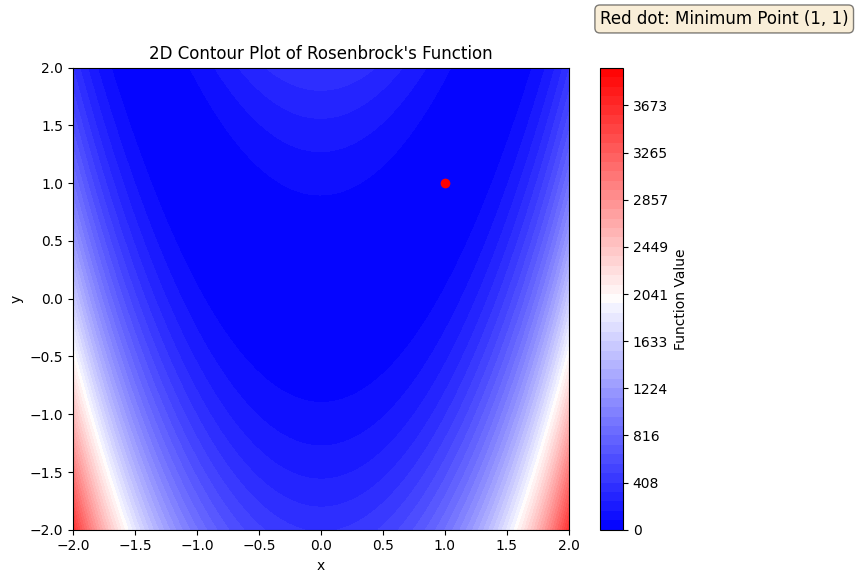

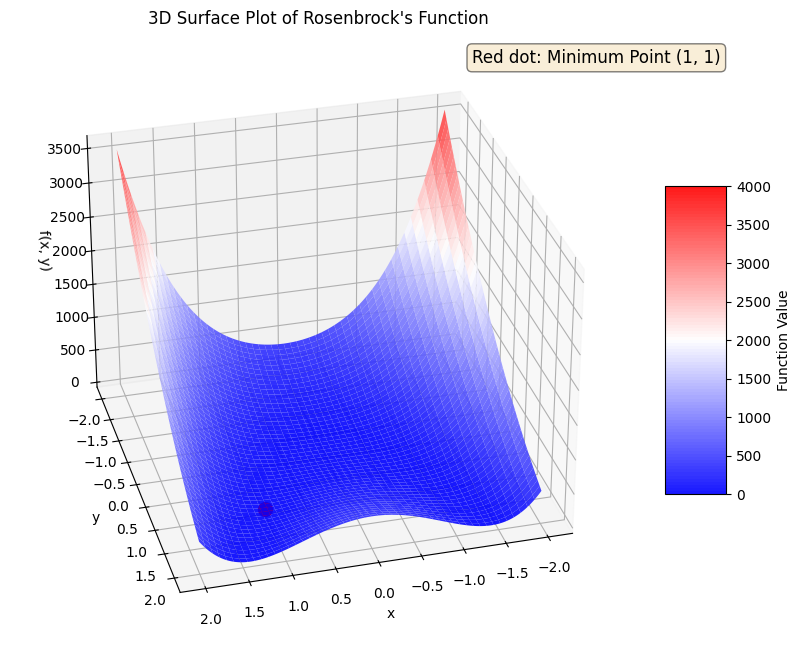

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Define Rosenbrock's function
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

# Create a grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Create custom colormap
colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # Blue -> White -> Red
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the colormap to the range of Z values
norm = plt.Normalize(vmin=0, vmax=4000)

# Create 2D plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=np.linspace(0, 4000, 50), cmap=cm, norm=norm)
plt.plot(1, 1, 'ro')  # Minimum point
plt.title("2D Contour Plot of Rosenbrock's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour, label='Function Value')

# Add annotation box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2.25, 2.5, 'Red dot: Minimum Point (1, 1)', fontsize=12, verticalalignment='top', bbox=props)

plt.show()

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap=cm, norm=norm, alpha=0.9)
ax.plot([1], [1], [rosenbrock(1, 1)], marker='o', markersize=10, color='r')  # Minimum point
ax.set_title("3D Surface Plot of Rosenbrock's Function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.view_init(elev=30, azim=75)  # Adjust the view

# Add annotation box
ax.text2D(0.75, 0.95, 'Red dot: Minimum Point (1, 1)', transform=ax.transAxes, fontsize=12, bbox=props)

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Function Value')
plt.show()

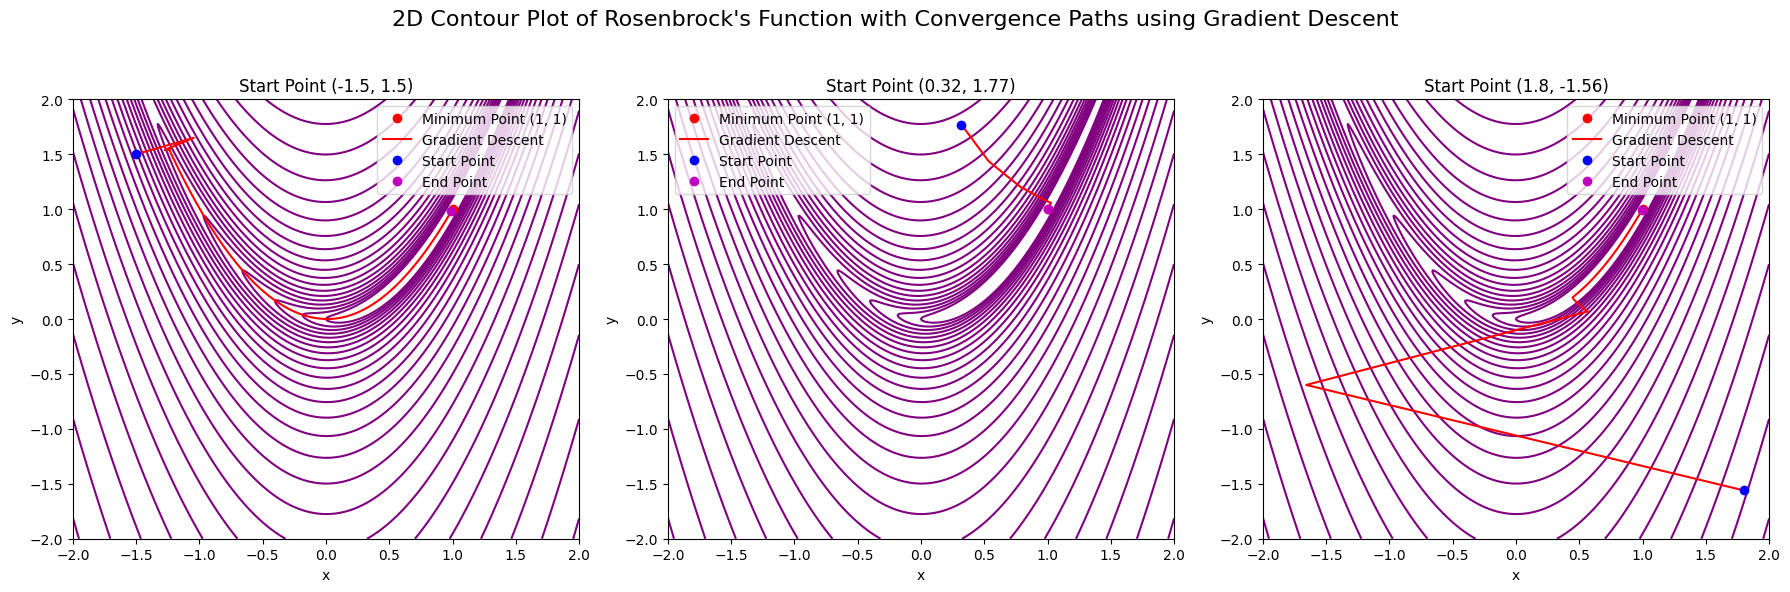

In [7]:
# Define the gradient of Rosenbrock's function
def rosenbrock_gradient(x, y):
    df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# Gradient descent algorithm
def gradient_descent(x0, y0, learning_rate=0.001, max_iter=10000, tol=1e-6):
    x, y = x0, y0
    path = [(x, y)]
    for _ in range(max_iter):
        grad = rosenbrock_gradient(x, y)
        x_new, y_new = x - learning_rate * grad[0], y - learning_rate * grad[1]
        path.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    return np.array(path)

# Random initializations
initializations = [(-1.5, 1.5), (0.32, 1.77), (1.8, -1.56)]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (x0, y0) in zip(axs, initializations):
    path_gd = gradient_descent(x0, y0)
    
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), colors='purple')
    ax.plot(1, 1, 'ro', label='Minimum Point (1, 1)')  # Minimum point
    ax.plot(path_gd[:, 0], path_gd[:, 1], 'r-', label='Gradient Descent')
    ax.plot(x0, y0, 'bo', label='Start Point')  # Start point
    ax.plot(path_gd[-1, 0], path_gd[-1, 1], 'mo', label='End Point')  # End point
    ax.set_title(f"Start Point ({x0}, {y0})")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Add a large title to the entire figure
fig.suptitle("2D Contour Plot of Rosenbrock's Function with Convergence Paths using Gradient Descent", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

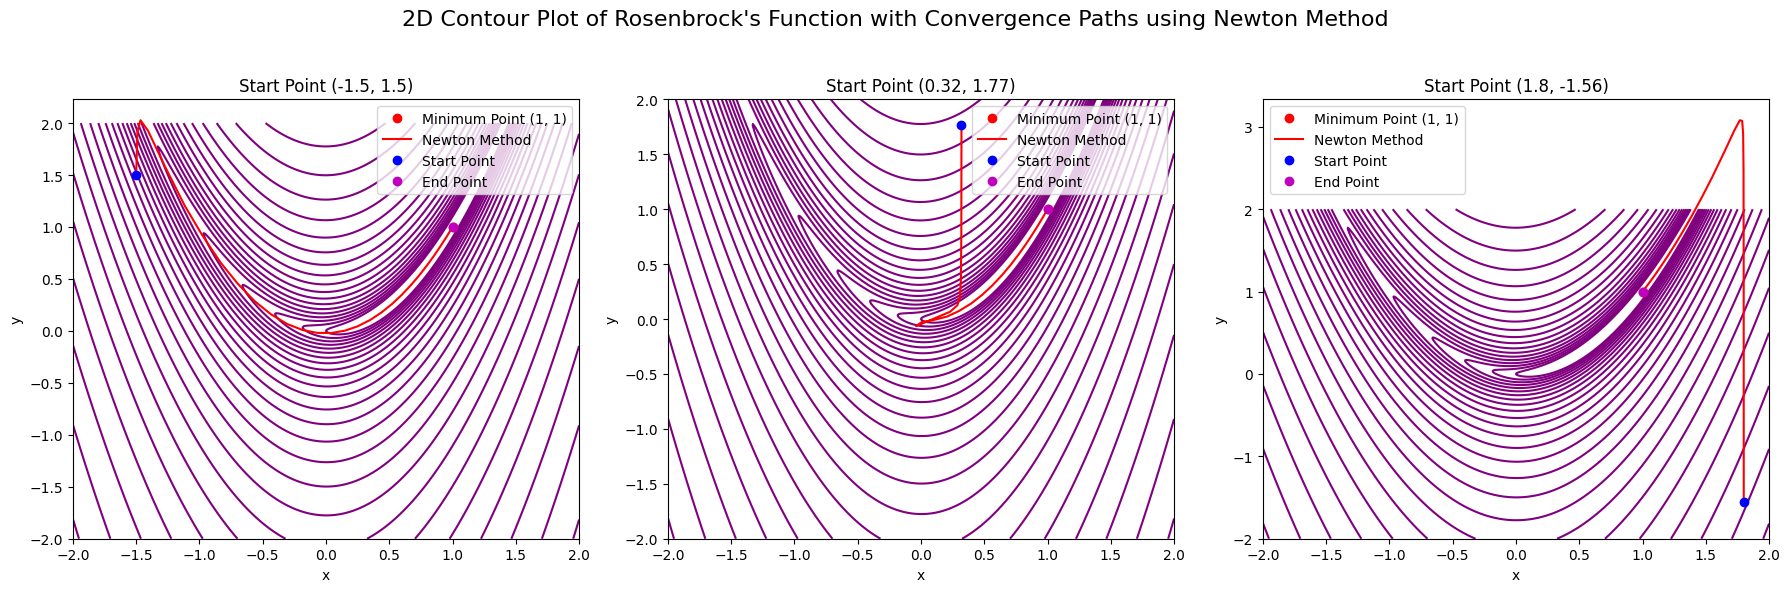

In [15]:
# Define the Hessian of Rosenbrock's function
def rosenbrock_hessian(x, y):
    d2f_dx2 = 1200 * x**2 - 400 * y + 2
    d2f_dxy = -400 * x
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxy], [d2f_dxy, d2f_dy2]])

# Compact Newton's method algorithm with damping factor
def newton_method(x0, y0, max_iter=100, tol=1e-6, damping=0.6):
    x, y = x0, y0
    path = [[x0,y0]]
    for _ in range(max_iter):
        grad = rosenbrock_gradient(x, y)
        hess = rosenbrock_hessian(x, y)
        delta = np.linalg.solve(hess, grad)
        x, y = x - damping * delta[0], y - damping * delta[1]
        path.append([x, y])
        if np.linalg.norm(delta) < tol:
            break
    return np.array(path)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (x0, y0) in zip(axs, initializations):
    path_nm = newton_method(x0, y0)
    
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), colors='purple')
    ax.plot(1, 1, 'ro', label='Minimum Point (1, 1)')  # Minimum point
    ax.plot(path_nm[:, 0], path_nm[:, 1], 'r-', label='Newton Method')
    ax.plot(x0, y0, 'bo', label='Start Point')  # Start point
    ax.plot(path_nm[-1, 0], path_nm[-1, 1], 'mo', label='End Point')  # End point
    ax.set_title(f"Start Point ({x0}, {y0})")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Add a large title to the entire figure
fig.suptitle("2D Contour Plot of Rosenbrock's Function with Convergence Paths using Newton Method", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

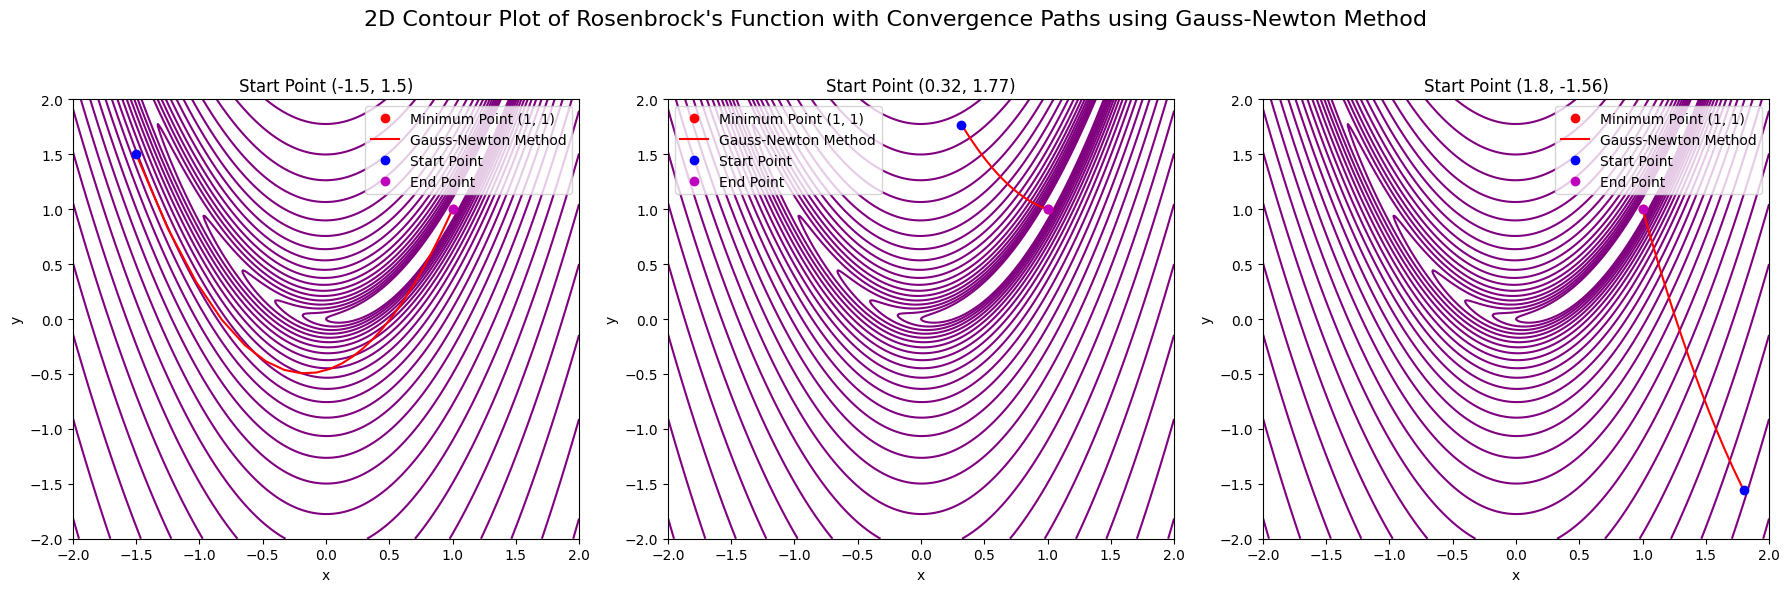

In [12]:
#def the Gauss-Newton approximation of the Hessian
def rosenbrock_hessian_approx(x, y):
    return np.array([[800*x**2+2, -400*x], [-400*x, 200]])

# Gauss-Newton method with damping factor
def gauss_newton_method(x0, y0, max_iter=100, tol=1e-6, damping=0.1):
    x, y = x0, y0
    path = [[x0, y0]]
    for _ in range(max_iter):
        grad = rosenbrock_gradient(x, y)
        hess = rosenbrock_hessian_approx(x, y)
        delta = np.linalg.solve(hess, grad)
        x, y = x - damping * delta[0], y - damping * delta[1]
        path.append([x, y])
        if np.linalg.norm(delta) < tol:
            break
    return np.array(path)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (x0, y0) in zip(axs, initializations):
    path_gnm = gauss_newton_method(x0, y0)
    
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), colors='purple')
    ax.plot(1, 1, 'ro', label='Minimum Point (1, 1)')  # Minimum point
    ax.plot(path_gnm[:, 0], path_gnm[:, 1], 'r-', label='Gauss-Newton Method')
    ax.plot(x0, y0, 'bo', label='Start Point')  # Start point
    ax.plot(path_gnm[-1, 0], path_gnm[-1, 1], 'mo', label='End Point')  # End point
    ax.set_title(f"Start Point ({x0}, {y0})")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Add a large title to the entire figure
fig.suptitle("2D Contour Plot of Rosenbrock's Function with Convergence Paths using Gauss-Newton Method", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 103
         Function evaluations: 194
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 60
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 86
         Function evaluations: 161


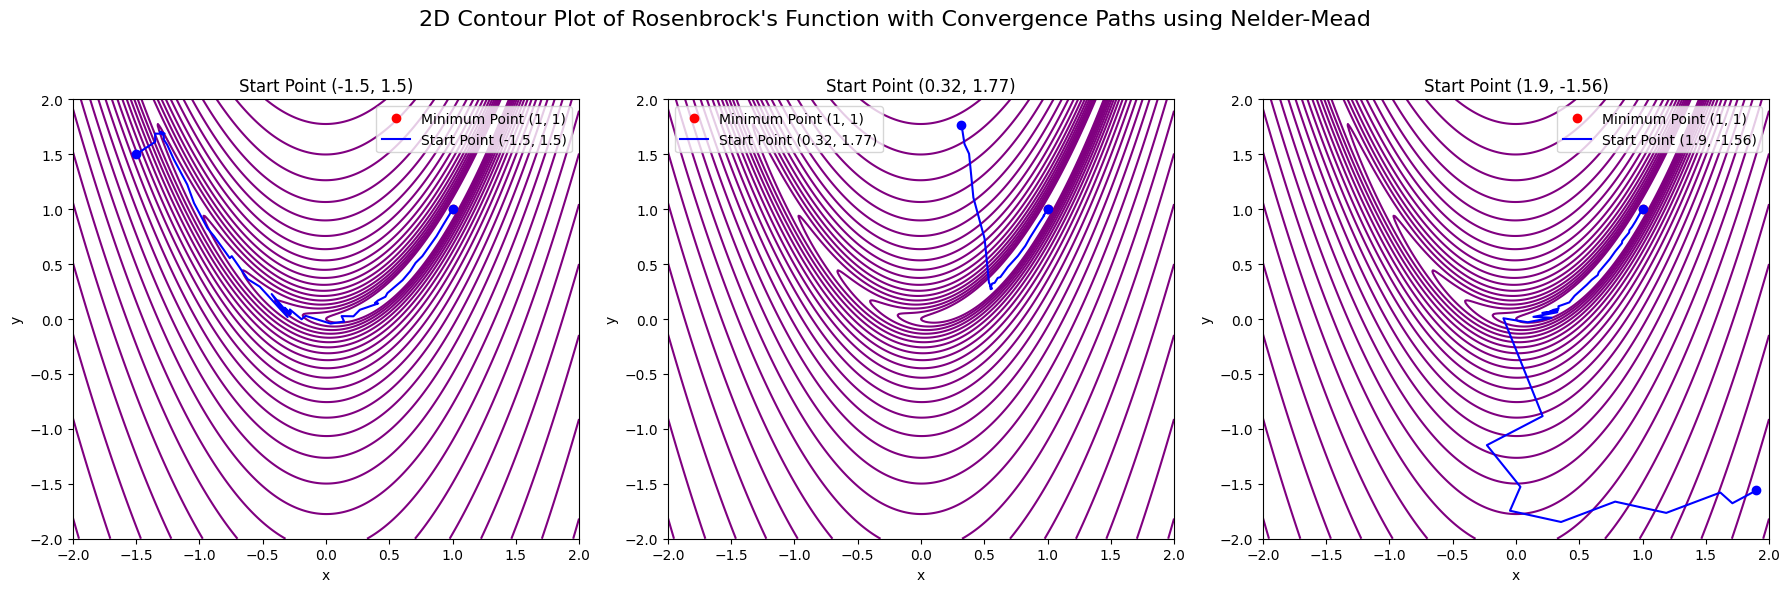

In [17]:
from scipy.optimize import minimize

# Redefine Rosenbrock's function
def rosenbrock2 (xy):
    x, y = xy
    return 100 * (y - x**2)**2 + (1 - x)**2

# Plot the convergence paths
# Random initializations
initializations = [(-1.5, 1.5), (0.32, 1.77), (1.9, -1.56)]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (x0, y0) in zip(axs, initializations):
    result = minimize(rosenbrock2, [x0, y0], method='Nelder-Mead', options={'disp': True, 'return_all': True})
    path_nm = np.array(result.allvecs)
    
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), colors='purple')
    ax.plot(1, 1, 'ro', label='Minimum Point (1, 1)')  # Minimum point
    ax.plot(path_nm[:, 0], path_nm[:, 1], 'b-', label=f'Start Point ({x0}, {y0})')
    ax.plot(x0, y0, 'bo')  # Start point
    ax.plot(path_nm[-1, 0], path_nm[-1, 1], 'bo')  # End point
    ax.set_title(f"Start Point ({x0}, {y0})")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

fig.suptitle("2D Contour Plot of Rosenbrock's Function with Convergence Paths using Nelder-Mead", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()